# Data Science Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Atribut Informasi


1. date : Date in MM-DD-YYYY
2. day : Day of the Week
3. quarter : A portion of the month. A month was divided into four quarters
4. department : Associated department with the instance
5. teamno : Associated team number with the instance
6. noofworkers : Number of workers in each team
7. noofstylechange : Number of changes in the style of a particular product
8. targetedproductivity : Targeted productivity set by the Authority for each team for each day.
9. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. overtime : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. idletime : The amount of time when the production was interrupted due to several reasons
14. idlemen : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

### Tujuan Pengelolaan Data

memprediksi 'productivity performance' pada masing masing tim menggunakan model machine learning decision tree, random forest, svm dan membandingkan ketiga performa model machine learning tersebut

### Read Data & Cek Kelengkapan Data

In [2]:
data = pd.read_csv('data/garments_worker_productivity.csv')

In [3]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [6]:
#statistik deskriptif target
data['actual_productivity'].describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

### Business Understanding

In [7]:
#mengubah tipe data
data['department'] = data['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month_name()

In [8]:
data['month'].unique()

array(['January', 'February', 'March'], dtype=object)

In [9]:
data['department'].value_counts()

sewing       940
finishing    257
Name: department, dtype: int64

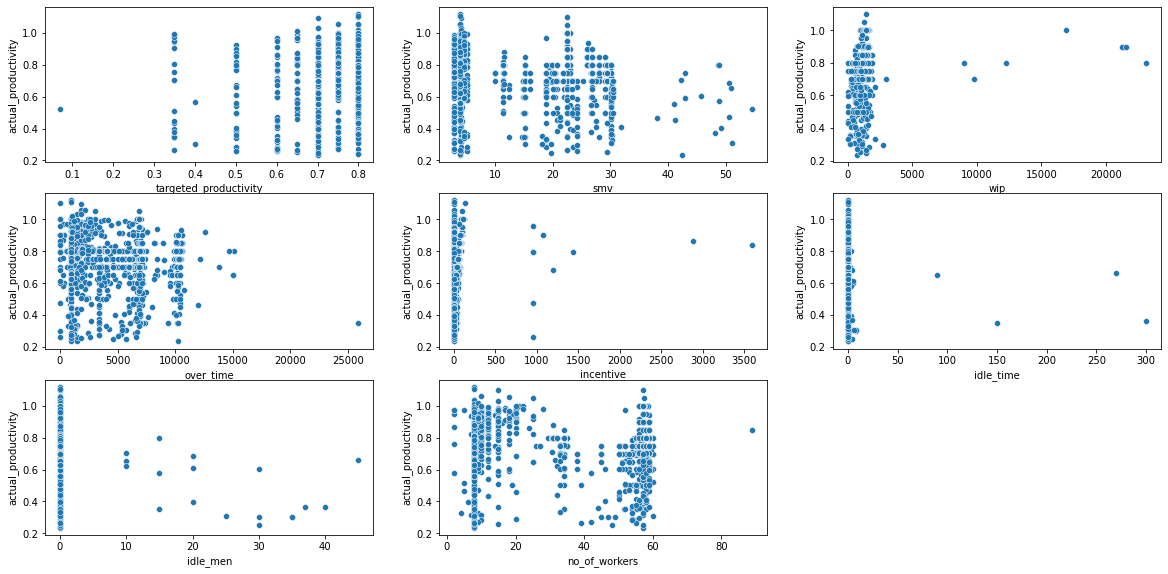

In [8]:
#visualisasi data numerik terhadap data target
numerik = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers']
plt.figure(figsize=(20, 20))

for x in range(len(numerik)):
    plt.subplot(6, 3, x+1)
    sns.scatterplot(x=data[numerik].columns[x],
                    y=data['actual_productivity'],
                    data = data[numerik])
plt.show()

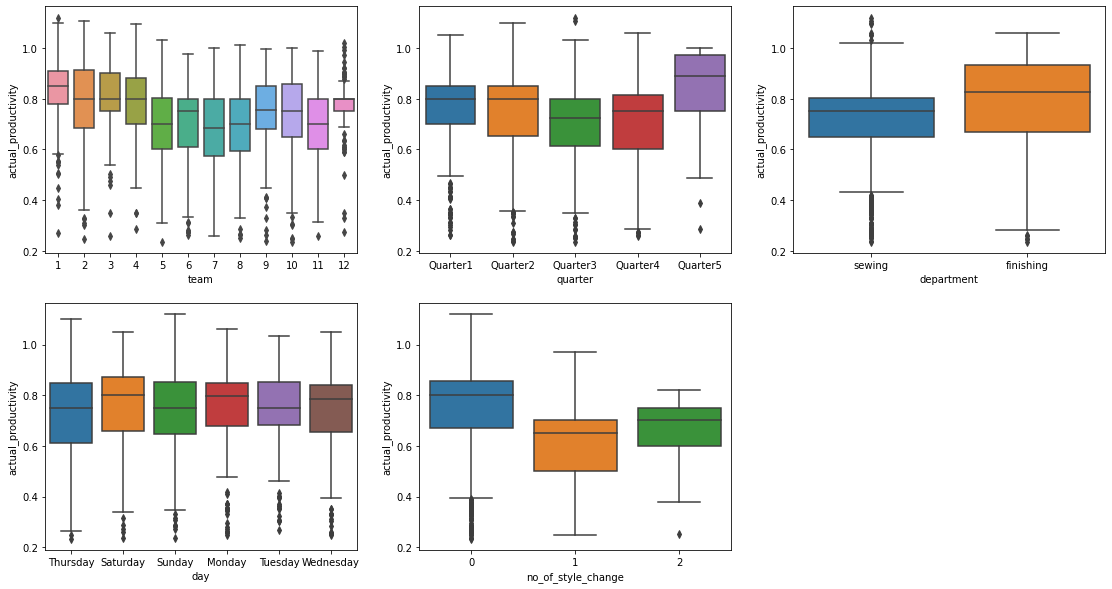

In [9]:
#visualisasi data kategorik terhadap data target
kategorik = ['team', 'quarter', 'department', 'day', 'no_of_style_change']
plt.figure(figsize=(19, 10))

for x in range(len(kategorik)):
    plt.subplot(2, 3, x+1)
    sns.boxplot(x=data[kategorik].columns[x],
                    y=data['actual_productivity'],
                    data=data[kategorik])

#### SMV

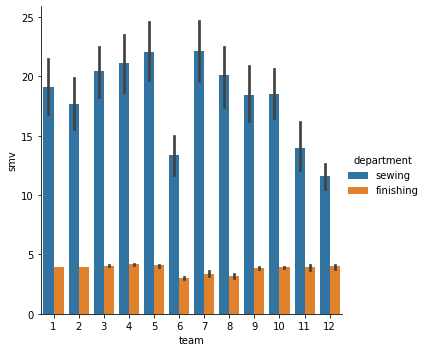

In [43]:
sns.catplot(x='team', y='smv', hue='department', kind='bar', data=data)

In [44]:
jumlah_svm = data.groupby(['department', 'team'])\
.agg(nilai_smv = ('smv', 'mean')).sort_values(by=['nilai_smv'], ascending=False).reset_index()
jumlah_svm

,department,team,nilai_smv
0,sewing,7,22.157123
1,sewing,5,22.095616
2,sewing,4,21.096835
3,sewing,3,20.416494
4,sewing,8,20.115926
5,sewing,1,19.132911
6,sewing,10,18.543378
7,sewing,9,18.426145
8,sewing,2,17.659647
9,sewing,11,13.954783


1. pada department sewing, nilai smv memiliki fluktuasi dimasing masing team
2. pada department finishing, nilai smv cenderung terdistribusi dengan baik di masing masing team
3. pada department sewing, top 5 svm bernilai tinggi pada team 7,5,4,3,8 dan top 5 svm bernilai rendah 12,6,11,2,9

<AxesSubplot:xlabel='no_of_workers', ylabel='smv'>

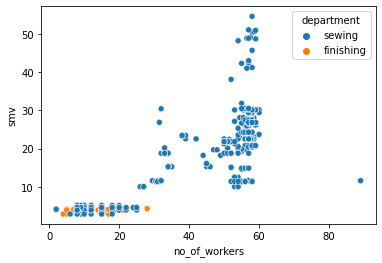

In [12]:
sns.scatterplot(x='no_of_workers', y='smv', hue='department', data=data)

1. semakin besar jumlah pekerja semakin besar waktu yang perlu dialokasikan untuk bekerja
2. department sewing, menunjukan distribusi no of workers dan smv tersebar
3. department finishing, menunjukan smv yang flat dan no of workers yang sedikit.

#### no_of_workers

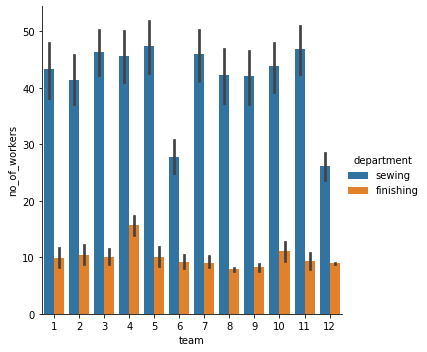

In [13]:
sns.catplot(x='team', y='no_of_workers', hue='department', kind='bar', data=data)

In [14]:
jumlah_workers = data.groupby(['department', 'team'])\
.agg(pekerja = ('no_of_workers', 'mean')).sort_values(by=['pekerja']).reset_index()
jumlah_workers

,department,team,pekerja
0,finishing,8,7.892857
1,finishing,9,8.238095
2,finishing,12,8.923077
3,finishing,7,9.043478
4,finishing,6,9.230769
5,finishing,11,9.263158
6,finishing,1,9.923077
7,finishing,5,10.100000
8,finishing,3,10.111111
9,finishing,2,10.375000


1. pada department sewing, no_of_workers tinggi yaitu team 5,11,3,7,4. sedangkan yang rendah team 12, 6, 2, 9, 8.

#### WIP

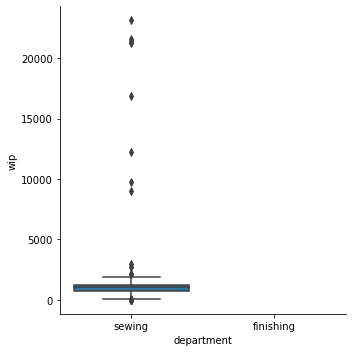

In [15]:
sns.catplot(x='department', y='wip', kind='box', data=data)

pada department finishing tidak memiliki nilai wip yang artinya department finishing tidak ada pekerjaan untuk dilakukan

In [16]:
wip_team = data.groupby(['department', 'team']).agg(wip_mean = ('wip', 'mean')).sort_values(by=['wip_mean']).reset_index()
wip_team

,department,team,wip_mean
0,sewing,5,773.741379
1,sewing,6,936.559322
2,sewing,11,968.135593
3,sewing,8,984.375000
4,sewing,7,999.509091
5,sewing,4,1218.677966
6,sewing,12,1259.915254
7,sewing,9,1283.724138
8,sewing,2,1326.280702
9,sewing,3,1409.293103


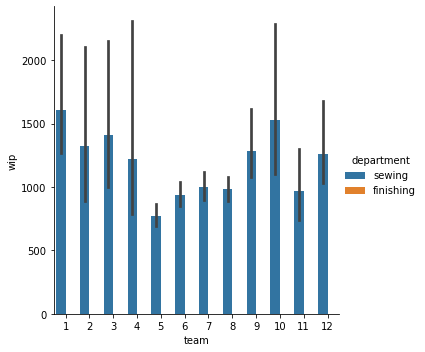

In [17]:
sns.catplot(x='team', y='wip', hue='department', kind='bar', data=data)

1. nilai wip tinggi yaitu 1,10,3,2,9
2. nilai wip rendah yaitu 5,6,11,8,7

#### Incentive

<AxesSubplot:xlabel='incentive', ylabel='idle_men'>

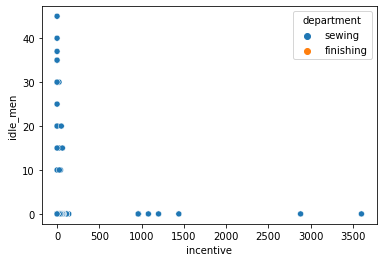

In [18]:
sns.scatterplot(x='incentive', y='idle_men', hue='department', data=data)

1. pada department sewing, banyak orang yang menganggur karena gangguan produksi sehingga incentive bernilai kurang lebih 0, tetapi ada beberapa team yang idle men bernilai 0 dan mendapatkan incentive

In [47]:
dats = data.groupby(['department', 'team']).agg(insentif = ('incentive', 'mean')).reset_index().sort_values(by=['insentif'], ascending=False)
dats

,department,team,insentif
20,sewing,9,76.349398
16,sewing,5,62.602740
12,sewing,1,61.936709
14,sewing,3,61.142857
21,sewing,10,49.094595
13,sewing,2,49.000000
22,sewing,11,48.347826
23,sewing,12,47.430233
15,sewing,4,46.582278
19,sewing,8,33.481481


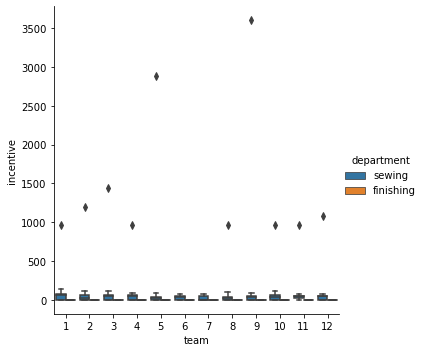

In [45]:
sns.catplot(x='team', y='incentive', hue='department', data=data, kind='box')

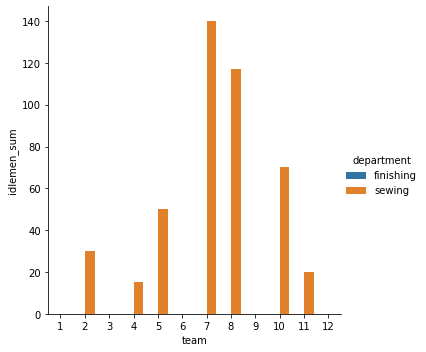

In [50]:
sns.catplot(x='team', y='idlemen_sum', hue='department', kind='bar', data=idlemen_team)

In [48]:
idlemen_team = data.groupby(['department', 'team']).agg(idlemen_sum = ('idle_men', 'sum')).sort_values(by=['idlemen_sum']).reset_index()
idlemen_team

,department,team,idlemen_sum
0,finishing,1,0
1,sewing,9,0
2,sewing,6,0
3,sewing,3,0
4,sewing,1,0
5,finishing,11,0
6,finishing,10,0
7,finishing,9,0
8,finishing,12,0
9,finishing,7,0


1. top 3 berdasarkan idle men terbanyak yaitu team 7,8 dan 10. dan idle men sedikit yaitu 4,11,2
2. kemungkinan dari department sewing yang mendapatkan incentive yaitu team 1,3,6,9,12
3. semua team dari department finishing tidak mendapat incentive

#### Overtime

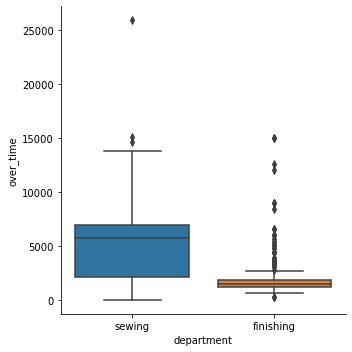

In [21]:
sns.catplot(x='department', y='over_time', kind='box', data=data)

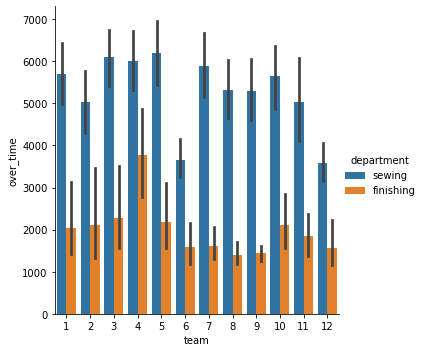

In [22]:
sns.catplot(x='team', y='over_time', hue='department', kind='bar', data=data)

In [23]:
over_time_team = data.groupby(['department', 'team']).agg(mean_overtime =('over_time', 'mean')).\
                sort_values(by=['mean_overtime']).reset_index()
over_time_team

,department,team,mean_overtime
0,finishing,8,1386.428571
1,finishing,9,1445.714286
2,finishing,12,1564.615385
3,finishing,6,1592.307692
4,finishing,7,1612.173913
5,finishing,11,1837.894737
6,finishing,1,2044.615385
7,finishing,2,2115.000000
8,finishing,10,2118.461538
9,finishing,5,2172.000000


1. team 5,3,4,7,1 memiliki overtime tinggi sedangkan team 12,6,2,11,9 bernilai rendah overtime nya

#### Idle_time

<AxesSubplot:xlabel='wip', ylabel='idle_time'>

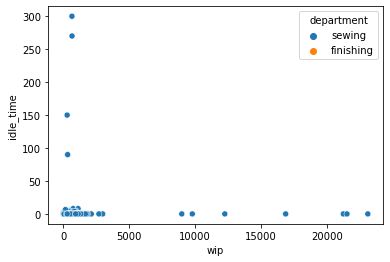

In [24]:
sns.scatterplot(x='wip', y='idle_time', hue='department', data=data)

pada department sewing, wip bernilai 0 disebabkan adanya gangguan waktu selama produksi. tetapi ada beberapa team yang berprogress dan tidak ada gangguan waktu dalam produksi.

In [25]:
idle_time_team = data.groupby(['department', 'team']).agg(idle_time_sum = ('idle_time', 'sum')).\
                  sort_values(by=['idle_time_sum']).reset_index()
idle_time_team

,department,team,idle_time_sum
0,finishing,1,0.0
1,sewing,9,0.0
2,sewing,6,0.0
3,sewing,3,0.0
4,sewing,1,0.0
5,finishing,11,0.0
6,finishing,10,0.0
7,finishing,9,0.0
8,finishing,12,0.0
9,finishing,7,0.0


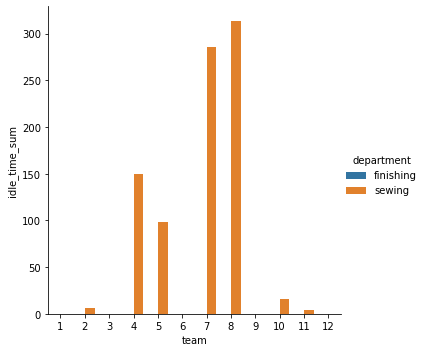

In [26]:
sns.catplot(x='team', y='idle_time_sum', hue='department', kind='bar', data=idle_time_team)

1. pada department sewing top 5 dengan nilai idle_time terbanyak adalah team 8,7,4,5,10.
2. pada team 1,3,6,9,12 tidak memiliki nilai idle_time dan kemungkinan memiliki nilai wip 

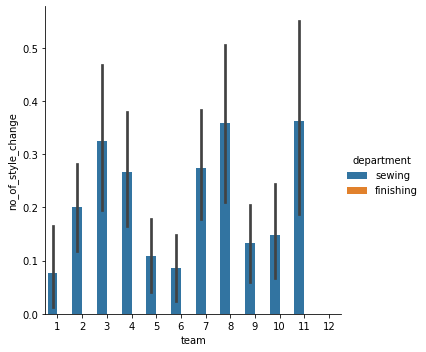

In [37]:
sns.catplot(x='team', y='no_of_style_change', hue='department', kind='bar', data=data)

#### Actual vs Targeted Productivity

<AxesSubplot:ylabel='Count'>

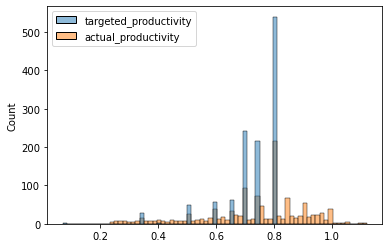

In [28]:
sns.histplot(data[['targeted_productivity', 'actual_productivity']])

actual productivity masing masing team lebih rendah dibandingkan dengan target produktivitas yang sudah ditetapkan oleh perusahaan. Dari sini akan di cari tau team berapa yang memiliki selisih antara actual dengan target productivity yang banyak

In [11]:
df = pd.DataFrame({'month':data['month'],
                  'department':data['department'],
                  'team':data['team'],
                  'targeted_productivity':data['targeted_productivity'],
                  'actual_productivity':data['actual_productivity']})
df['actual-targeted'] = df[ 'actual_productivity'] - df['targeted_productivity']
df.head(20)

,month,department,team,targeted_productivity,actual_productivity,actual-targeted
0,January,sewing,8,0.80,0.940725,0.140725
1,January,finishing,1,0.75,0.886500,0.136500
2,January,sewing,11,0.80,0.800570,0.000570
3,January,sewing,12,0.80,0.800570,0.000570
4,January,sewing,6,0.80,0.800382,0.000382
5,January,sewing,7,0.80,0.800125,0.000125
6,January,finishing,2,0.75,0.755167,0.005167
7,January,sewing,3,0.75,0.753683,0.003683
8,January,sewing,2,0.75,0.753098,0.003098
9,January,sewing,1,0.75,0.750428,0.000428


kolom actual_targeted akan dilakukan perhitungan mean agar lebih mudah untuk mengetahui tim berapa yang actual nya tidak bisa mencapai target productivity.

In [29]:
df_new = df.groupby(['month', 'department', 'team']).agg(rata_actual_target = ('actual-targeted', 'mean')).reset_index()

In [30]:
df_new

,month,department,team,rata_actual_target
0,February,finishing,1,0.049962
1,February,finishing,2,0.157092
2,February,finishing,4,-0.069398
3,February,finishing,6,-0.270028
4,February,finishing,7,0.192194
5,February,finishing,8,0.183507
6,February,finishing,9,0.207113
7,February,finishing,10,0.071725
8,February,finishing,12,-0.047778
9,February,sewing,1,0.097107


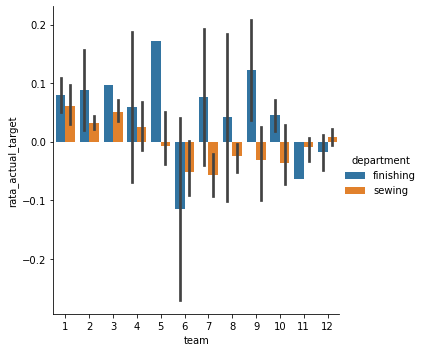

In [38]:
sns.catplot(x='team', y='rata_actual_target', hue='department', data=df_new, kind='bar')

secara keseluruhan tim 1 dan 3 adalah tim yang produktif berdasarkan department sewing

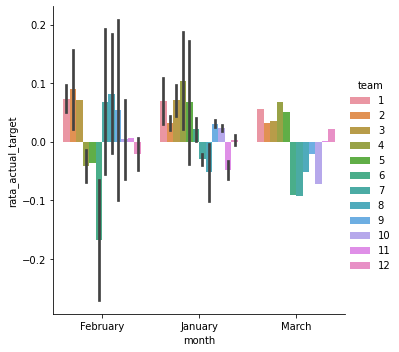

In [39]:
sns.catplot(x='month', y='rata_actual_target', kind='bar', hue='team', data=df_new)

1. pada bulan januari, team 7,8 dan 11 actual productivity tidak mencapai target productivity
2. pada bulan februari, team 4,5,6 dan 12 actual productivity tidak mencapai target productivity
3. pada bulan Maret, team 6,7,8,9 dan 10 actual productivity tidak mencapai target productivity
4. dari januari-maret, mayoritas team yang actual productivitynya tidak mencapai target productivitynya adalah team 7,8 dan 6.

### Data Cleansing

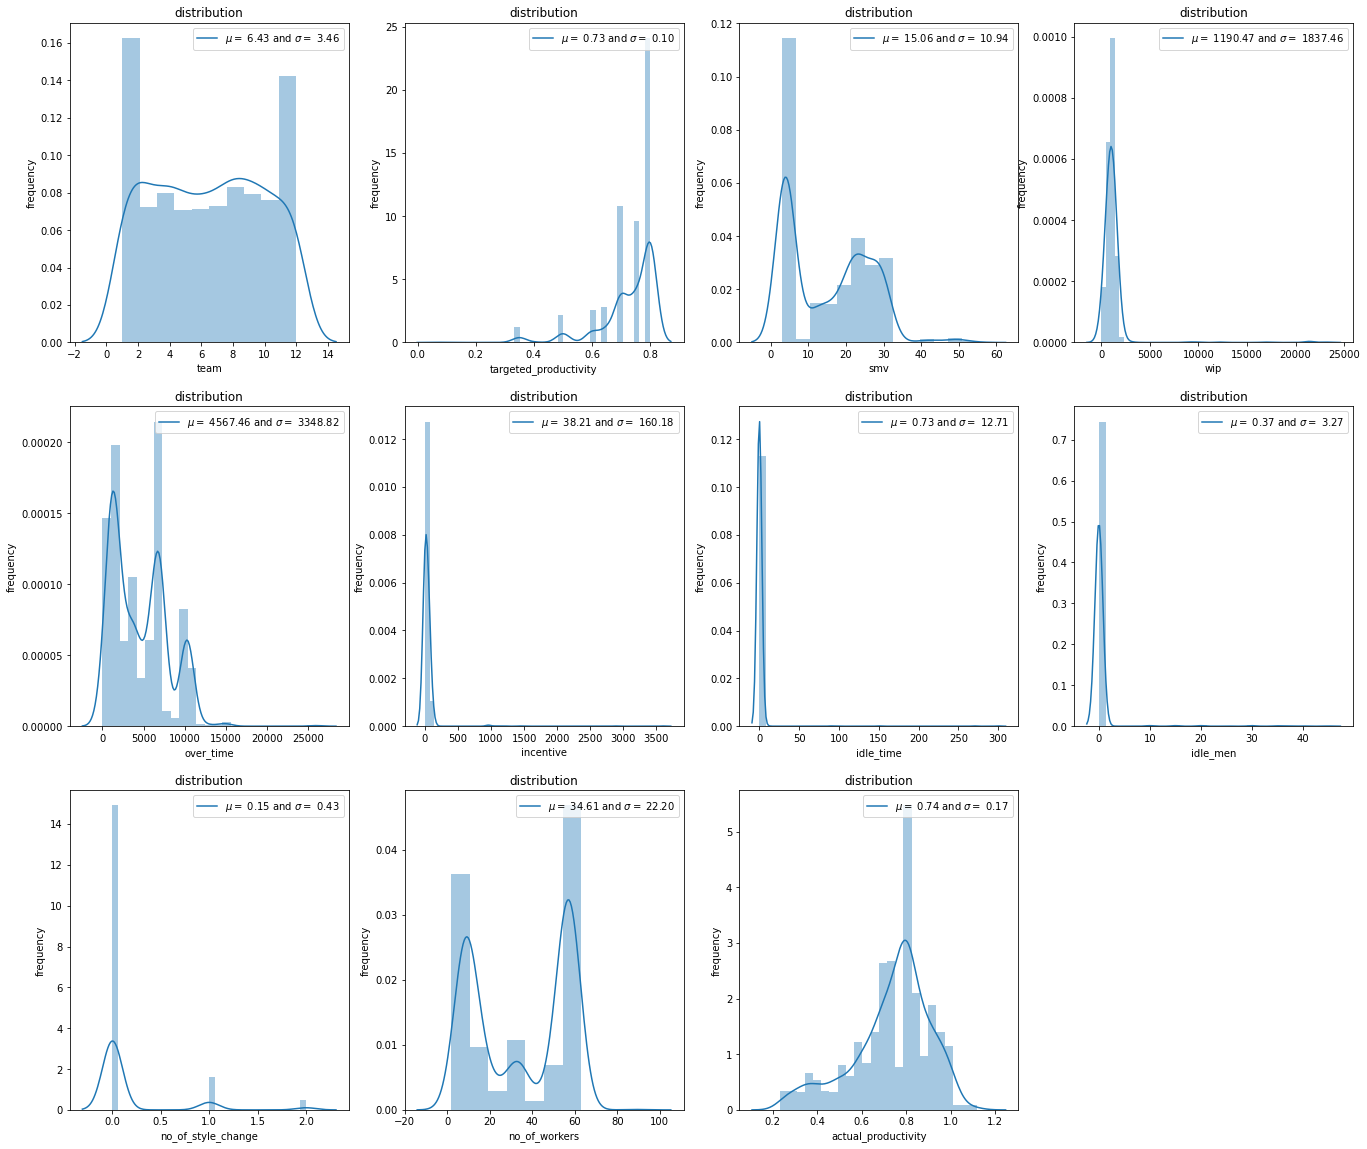

In [10]:
#preview distribusi normal pada data numerik
numerik = ['team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']
plt.figure(figsize=(23, 20))

for x in range(len(data[numerik].columns)):
    plt.subplot(3,4,x+1) 
    sns.distplot(data[numerik[x]])
    plt.legend(['$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(data[numerik[x]].mean(), data[numerik[x]].std())], loc='upper right')
    plt.ylabel('frequency')
    plt.title('distribution')

plt.show()

In [58]:
#cek duplikat
data[data.duplicated()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month


In [10]:
# jumlah null value kolom wip berjumlah 506, sehingga value kolom wip lebih baik di isi 0
data['wip'].fillna(0, inplace=True)

1. data date kita rubah formatnya dengan pd.to_Datetime
2. data team kita rubah formatnya ke str

In [11]:
#drop kolom month, ubah tipe kolom no_of_style_change jadi str
data = data.drop(['month'], axis=1)
data['no_of_style_change'] = data['no_of_style_change'].astype(str)
data['team'] = data['team'].astype(str)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   object        
 13  no_

#### Remove Outlier

In [13]:
numerik = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(numerik)

['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']


In [14]:
kategorik =  data.select_dtypes(exclude=['int64', 'float64']).columns.to_list()
print(kategorik)

['date', 'quarter', 'department', 'day', 'team', 'no_of_style_change']


outlier numerik


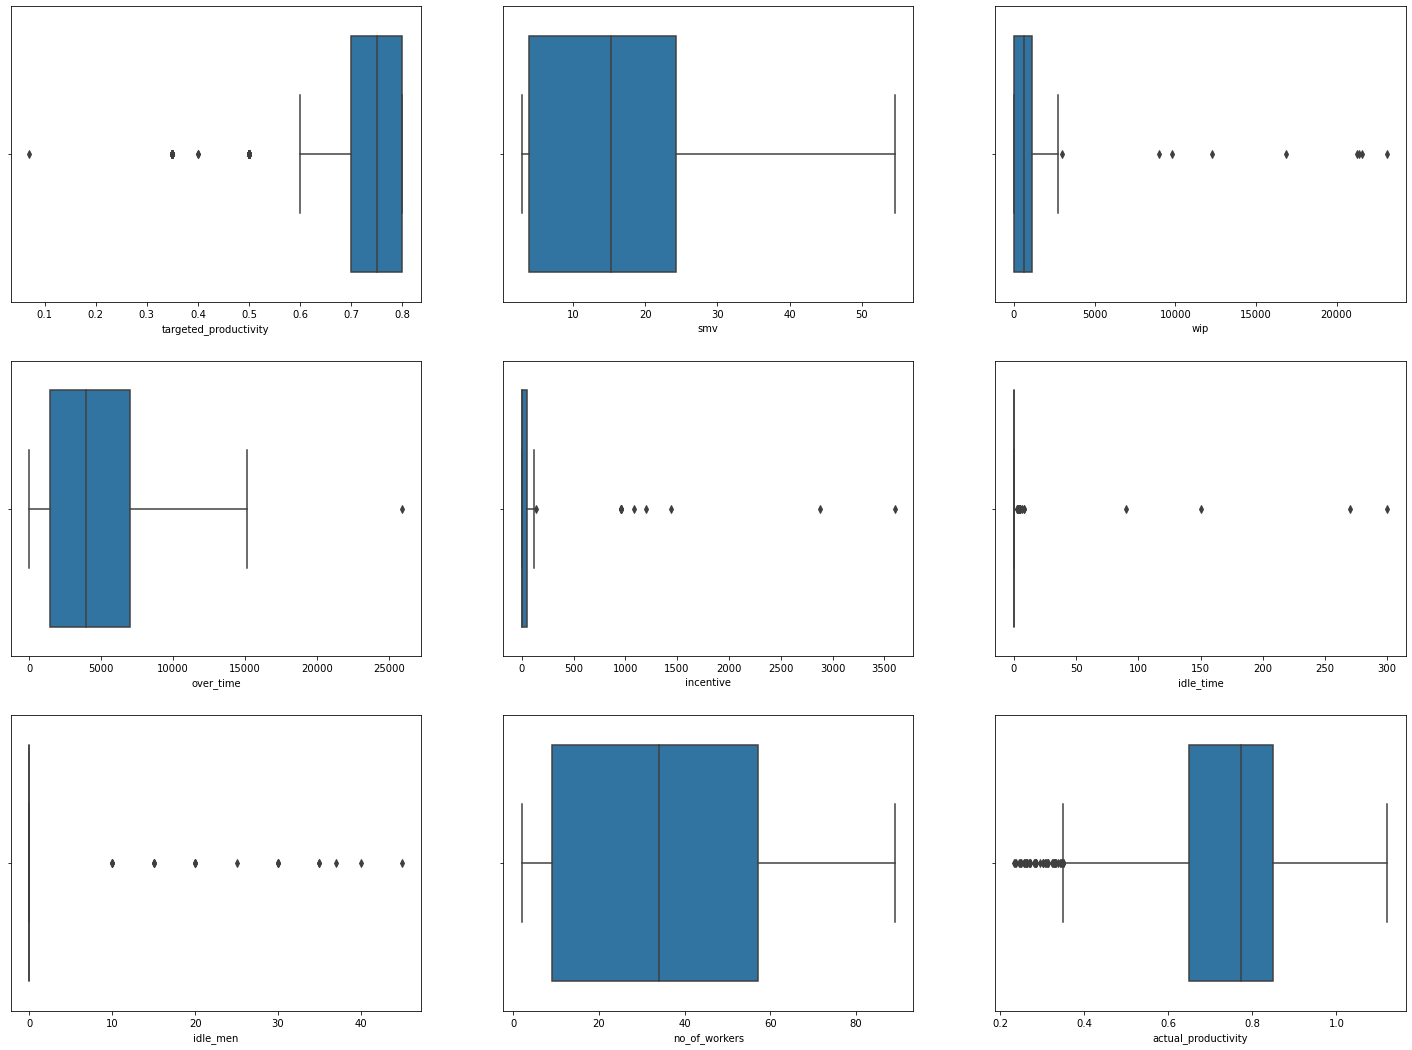

In [15]:
#outlier numerik
def plot_numerik(df):
  plt.figure(figsize=(25, 25))

  for x in range(len(df[numerik].columns)):
    plt.subplot(4, 3, x+1)
    sns.boxplot(x=df[numerik].columns[x],
                data=df[numerik])
plt.show()
print("outlier numerik")
plot_numerik(data)

In [16]:
#remove outlier target_productivity
numerik_lower = ['targeted_productivity']
def remove_outlier(df):
    for col in df[numerik_lower].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        cond1 = df[col] < lower
        df[col] = np.where(cond1, lower, df[col])
        
remove_outlier(data)

data numerik setelah remove outlier untuk lower


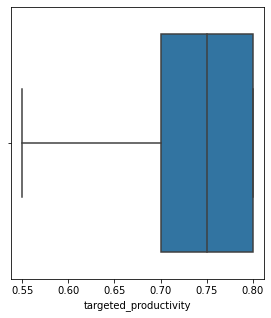

In [17]:
def numerik_setelah_outlier(df):
  plt.figure(figsize=(10, 5))

  for x in range(len(df[numerik_lower].columns)):
    plt.subplot(1, 2, x+1)
    sns.boxplot(x=df[numerik_lower].columns[x],
                data=df[numerik_lower])
    
plt.show()
print("data numerik setelah remove outlier untuk lower")
numerik_setelah_outlier(data)

In [18]:
#remove outlier kolom wip, over_time dan incentive
numerik_upper = ['wip', 'over_time', 'incentive']
def remove_outlier(df):
    for col in df[numerik_upper].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        cond1 = df[col] > upper
        df[col] = np.where(cond1, upper, df[col])
        
remove_outlier(data)

data numerik setelah remove outlier untuk upper


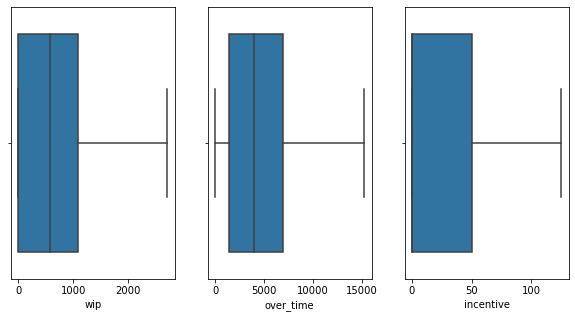

In [19]:
def numerik_setelah_outlier(df):
  plt.figure(figsize=(10, 5))

  for x in range(len(df[numerik_upper].columns)):
    plt.subplot(1, 3, x+1)
    sns.boxplot(x=df[numerik_upper].columns[x],
                data=df[numerik_upper])
    
plt.show()
print("data numerik setelah remove outlier untuk upper")
numerik_setelah_outlier(data)

remove outlier numerik


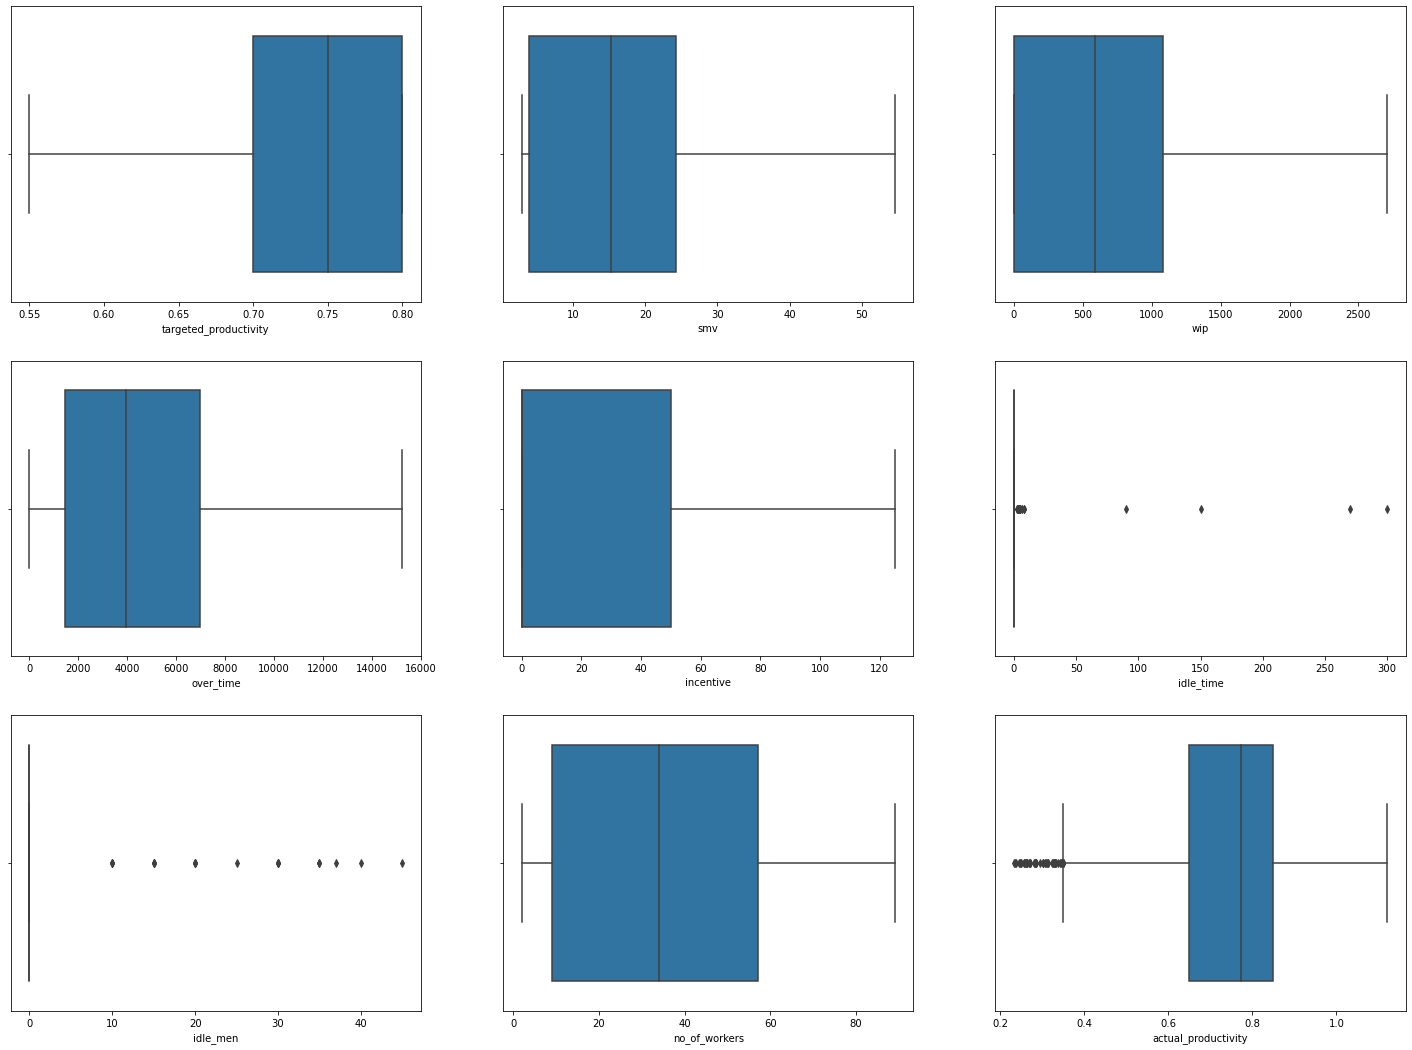

In [20]:
#remove outlier numerik
def plot_numerik(df):
  plt.figure(figsize=(25, 25))

  for x in range(len(df[numerik].columns)):
    plt.subplot(4, 3, x+1)
    sns.boxplot(x=df[numerik].columns[x],
                data=df[numerik])
plt.show()
print("remove outlier numerik")
plot_numerik(data)

#### Correlation

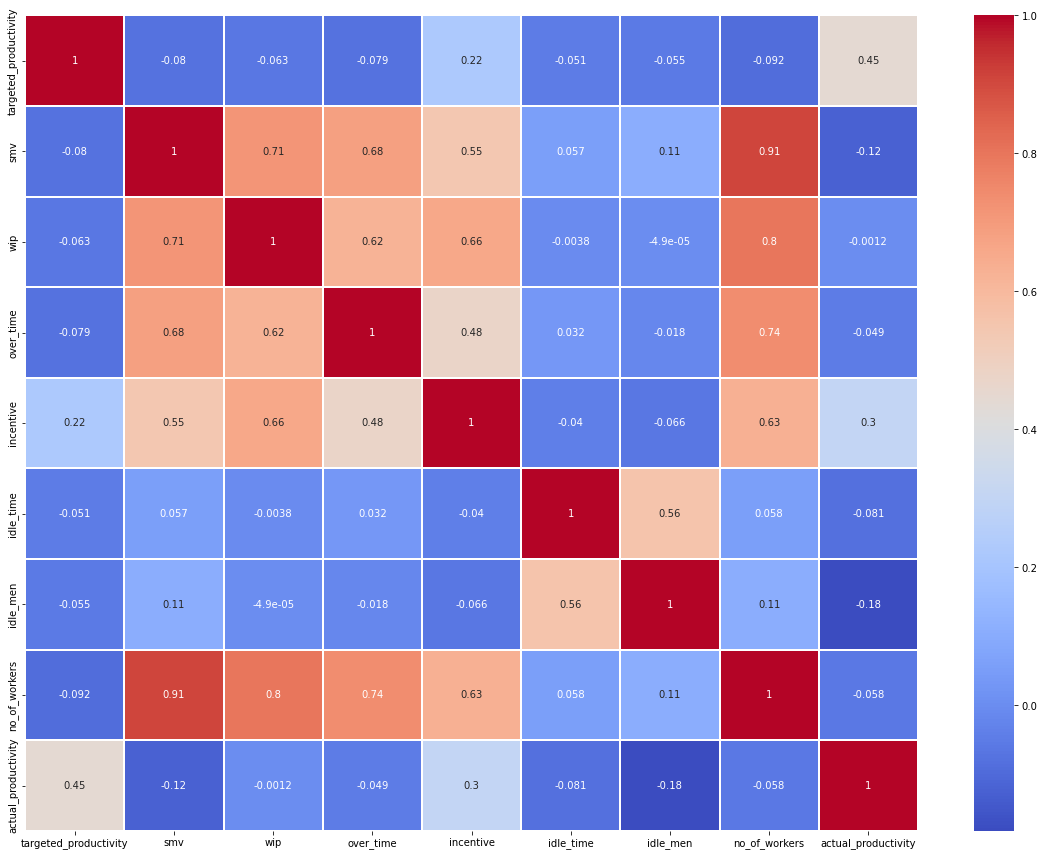

In [23]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(data.corr(), cmap = "coolwarm", annot=True, linewidth=2)

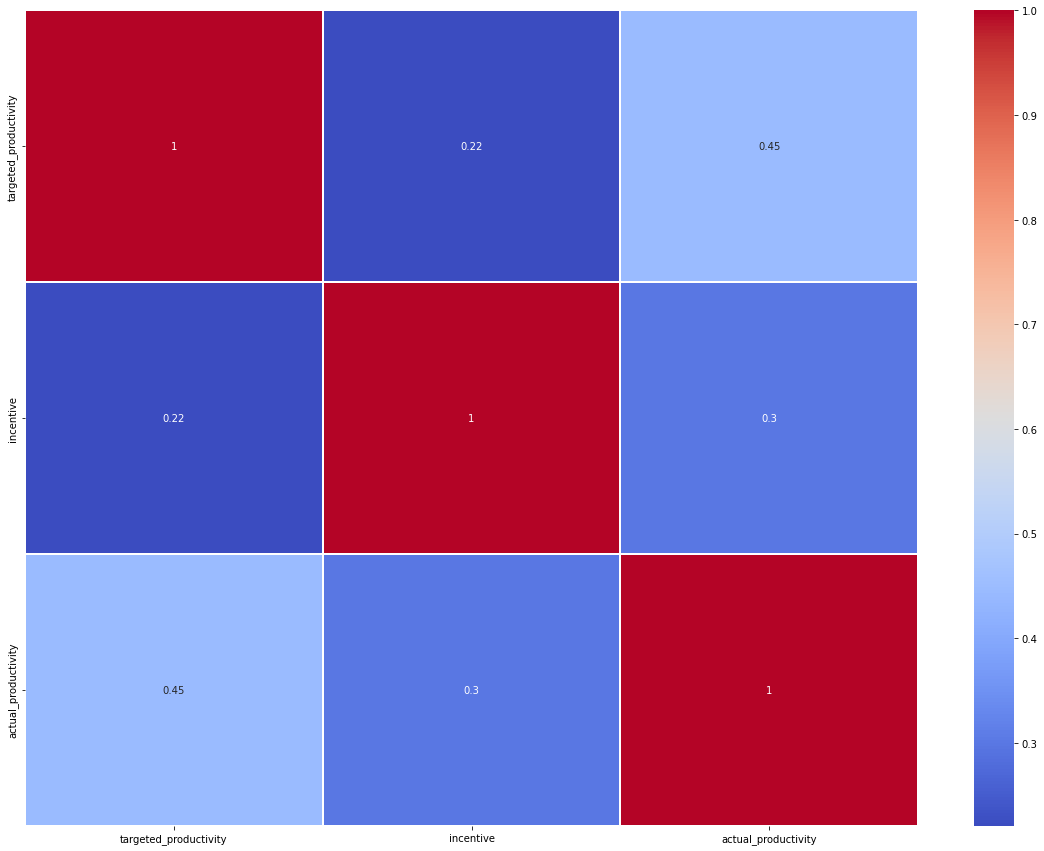

In [24]:
#visualisasi korelasi yang bernilai lebih dari 0.3
high_corr = data.corr()
high_corr_feat = high_corr[abs(high_corr['actual_productivity']) >= 0.2].index

plt.figure(figsize=(20,15))
ax = sns.heatmap(data[high_corr_feat].corr(), cmap = "coolwarm", annot=True, linewidth=2)

korelasi yang tinggi antara target productivity dengan actual productivity sebesar 0.45 dan korelasi antara actual productivity dengan incentive sebesar 0.3

tampilkan korelasi lebih dari 0.2 dengan pairplot

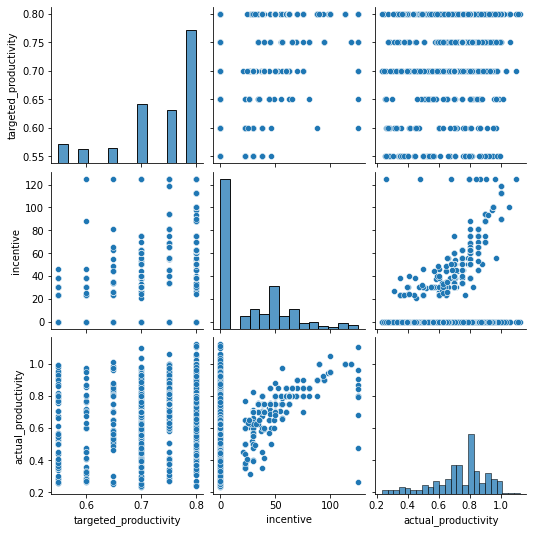

In [25]:
col = ["targeted_productivity", "incentive", "actual_productivity"]
sns.pairplot(data[col], size=2.5)

### Feature Engineering

#### Encode

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [22]:
#drop data date
data = data.drop(['date'], axis=1)

In [23]:
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [24]:
#encoding kolom quarter, department, day dan team
def nominal(df, col):
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([data, dummies], axis=1)
    return df

data = nominal(data, 'quarter')
data = nominal(data, 'department')
data = nominal(data, 'day')
data = nominal(data, 'team')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   object 
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  quarter_Quarter1       1197 non-null   uint8  
 15  quar

In [26]:
#encoding kolom no_of_style_change
data['no_of_style_change'] = LabelEncoder().fit_transform(data['no_of_style_change'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int32  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  quarter_Quarter1       1197 non-null   uint8  
 15  quar

In [28]:
#drop data yang sudah di encode
data = data.drop(["quarter", "department", "day", "team"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   smv                    1197 non-null   float64
 2   wip                    1197 non-null   float64
 3   over_time              1197 non-null   float64
 4   incentive              1197 non-null   float64
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int32  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
 10  quarter_Quarter1       1197 non-null   uint8  
 11  quarter_Quarter2       1197 non-null   uint8  
 12  quarter_Quarter3       1197 non-null   uint8  
 13  quarter_Quarter4       1197 non-null   uint8  
 14  quarter_Quarter5       1197 non-null   uint8  
 15  depa

#### SMOTE

karena algoritma yang diinginkan adalah algoritma klasifikasi, maka buat kolom baru bernama new_productivity. pertama kita buat thresold nilai dengan linspace 

In [29]:
thresold = np.linspace(min(data['actual_productivity']), max(data['actual_productivity']), 3)
thresold

array([0.23370548, 0.67707149, 1.1204375 ])

0.73541328 adalah thresold dimana jika nilai < 0.67707149 kurang produktif dan nilai > 0.67707149 produktif

In [30]:
data['new_actual_productivity'] = data.apply(lambda row:0 if row['actual_productivity'] < 0.67707149 else 1, axis=1)

In [31]:
data.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,new_actual_productivity
0,0.80,26.16,1108.0,7080.0,98.0,0.0,0,0,59.0,0.940725,...,0,0,0,0,0,0,0,1,0,1
1,0.75,3.94,0.0,960.0,0.0,0.0,0,0,8.0,0.886500,...,0,0,0,0,0,0,0,0,0,1
2,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30.5,0.800570,...,0,0,0,0,0,0,0,0,0,1
3,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30.5,0.800570,...,1,0,0,0,0,0,0,0,0,1
4,0.80,25.90,1170.0,1920.0,50.0,0.0,0,0,56.0,0.800382,...,0,0,0,0,0,1,0,0,0,1


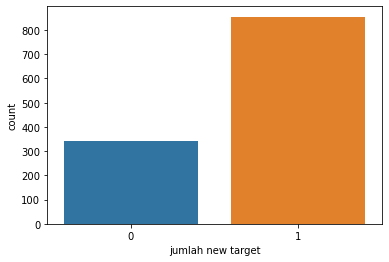

In [32]:
sns.countplot(x='new_actual_productivity', data=data)
plt.xlabel("jumlah new target")
plt.show()

In [33]:
data['new_actual_productivity'].value_counts()

1    855
0    342
Name: new_actual_productivity, dtype: int64

1. jumlah nilai 0 ada 342, artinya actual productivity < thresold (tidak produktif)
2. jumlah nilai 1 ada 855, artinya actual productivity > thresold (produktif)


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   targeted_productivity    1197 non-null   float64
 1   smv                      1197 non-null   float64
 2   wip                      1197 non-null   float64
 3   over_time                1197 non-null   float64
 4   incentive                1197 non-null   float64
 5   idle_time                1197 non-null   float64
 6   idle_men                 1197 non-null   int64  
 7   no_of_style_change       1197 non-null   int32  
 8   no_of_workers            1197 non-null   float64
 9   actual_productivity      1197 non-null   float64
 10  quarter_Quarter1         1197 non-null   uint8  
 11  quarter_Quarter2         1197 non-null   uint8  
 12  quarter_Quarter3         1197 non-null   uint8  
 13  quarter_Quarter4         1197 non-null   uint8  
 14  quarter_Quarter5        

In [35]:
df = data
df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,new_actual_productivity
0,0.80,26.16,1108.0,7080.0,98.0,0.0,0,0,59.0,0.940725,...,0,0,0,0,0,0,0,1,0,1
1,0.75,3.94,0.0,960.0,0.0,0.0,0,0,8.0,0.886500,...,0,0,0,0,0,0,0,0,0,1
2,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30.5,0.800570,...,0,0,0,0,0,0,0,0,0,1
3,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30.5,0.800570,...,1,0,0,0,0,0,0,0,0,1
4,0.80,25.90,1170.0,1920.0,50.0,0.0,0,0,56.0,0.800382,...,0,0,0,0,0,1,0,0,0,1


In [36]:
#pisahkan independent variable dengan dependent variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('before sampling ', Counter(y))

#gunakan SMOTE
sampling = SMOTE(sampling_strategy=0.8)
X_smote, y_smote = sampling.fit_resample(X, y)
print('after sampling ', Counter(y_smote))

#balikin dari df ke data
data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

before sampling  Counter({1: 855, 0: 342})
after sampling  Counter({1: 855, 0: 684})


In [37]:
data.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,new_actual_productivity
0,0.80,26.16,1108.0,7080.0,98.0,0.0,0,0,59.0,0.940725,...,0,0,0,0,0,0,0,1,0,1
1,0.75,3.94,0.0,960.0,0.0,0.0,0,0,8.0,0.886500,...,0,0,0,0,0,0,0,0,0,1
2,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30.5,0.800570,...,0,0,0,0,0,0,0,0,0,1
3,0.80,11.41,968.0,3660.0,50.0,0.0,0,0,30.5,0.800570,...,1,0,0,0,0,0,0,0,0,1
4,0.80,25.90,1170.0,1920.0,50.0,0.0,0,0,56.0,0.800382,...,0,0,0,0,0,1,0,0,0,1


Text(0.5, 0, 'jumlah new target after SMOTE')

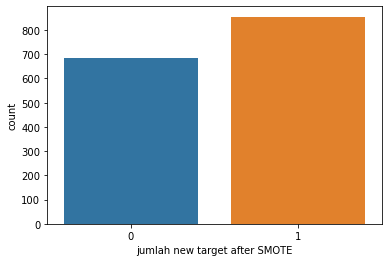

In [38]:
sns.countplot(x='new_actual_productivity', data=data)
plt.xlabel('jumlah new target after SMOTE')

### Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
#split X dan y
y = data["new_actual_productivity"]
X = data.drop(["new_actual_productivity", "actual_productivity"], axis=1)

In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=45)
i = 1

for train_index, test_index in kf.split(X):
    print("Fold:", i)
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    i+=1

Fold: 1
Train: [   1    2    3 ... 1535 1536 1538] Test: [   0    5    7    8   10   13   14   16   30   32   34   38   39   43
   46   48   50   52   61   66   69   74   99  102  104  107  110  112
  115  118  124  129  130  133  145  151  154  160  166  167  171  179
  194  195  214  218  228  238  240  249  253  256  257  260  265  284
  285  286  297  309  313  315  322  328  329  330  336  337  339  347
  352  361  368  378  382  384  388  389  390  403  415  417  433  450
  462  463  467  470  478  483  495  506  510  512  514  517  528  531
  533  536  541  547  552  568  570  575  581  582  589  592  595  600
  604  608  620  626  639  641  643  652  654  655  660  662  671  672
  676  677  684  689  692  700  701  705  707  712  724  735  737  745
  750  758  775  778  780  782  793  798  800  801  802  809  811  816
  819  823  827  830  836  838  839  859  861  863  866  867  868  869
  871  874  880  881  889  894  899  903  916  926  927  928  934  938
  945  946  951  954

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1232, 34), (1232,), (307, 34), (307,))

In [43]:
X_train.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,...,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,...,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,0.726486,15.177837,566.103466,4573.822492,23.035163,0.946423,0.578734,0.146104,34.298423,0.254870,...,0.060065,0.066558,0.074675,0.064935,0.077922,0.068994,0.067370,0.077922,0.083604,0.068994
std,0.079041,11.151156,581.876565,3324.440141,29.698186,13.291335,3.805845,0.412735,22.330168,0.435965,...,0.237704,0.249357,0.262973,0.246511,0.268158,0.253546,0.250764,0.268158,0.276905,0.253546
min,0.550000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.750000,15.260000,552.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,24.260000,1047.750000,6960.000000,45.000000,0.000000,0.000000,0.000000,57.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.800000,54.560000,2707.500000,15240.000000,125.000000,300.000000,45.000000,2.000000,89.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#feature scalling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

X_train.iloc[:,:7] = rs.fit_transform(X_train.iloc[:,:7])
X_train.iloc[:,8:9] = rs.fit_transform(X_train.iloc[:,8:9])
X_test.iloc[:, :7] = rs.fit_transform(X_test.iloc[:, :7])
X_test.iloc[:,8:9] = rs.fit_transform(X_test.iloc[:,8:9])

In [45]:
X_train.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,...,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,...,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,-0.235142,-0.004043,0.013461,0.089461,0.511893,0.946423,0.578734,0.146104,0.006090,0.254870,...,0.060065,0.066558,0.074675,0.064935,0.077922,0.068994,0.067370,0.077922,0.083604,0.068994
std,0.790407,0.548777,0.555358,0.602254,0.659960,13.291335,3.805845,0.412735,0.455718,0.435965,...,0.237704,0.249357,0.262973,0.246511,0.268158,0.253546,0.250764,0.268158,0.276905,0.253546
min,-2.000000,-0.608268,-0.526843,-0.739130,0.000000,0.000000,0.000000,0.000000,-0.653061,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.557087,-0.526843,-0.478261,0.000000,0.000000,0.000000,0.000000,-0.530612,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.442913,0.473157,0.521739,1.000000,0.000000,0.000000,0.000000,0.469388,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.500000,1.934055,2.057266,2.021739,2.777778,300.000000,45.000000,2.000000,1.122449,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Decision Tree

In [46]:
def evaluation_metrics(aktual, prediksi, name):
  cm = confusion_matrix(aktual, prediksi)
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
  precision = round((tp) / (tp+fp) * 100, 2)
  recall = round((tp) / (tp+fn) * 100, 2)
    
  print('Evaluation Model:', name)
  print(cm)
  print('Accuracy   :', accuracy, '%')
  print('Precision  :', precision, '%')
  print('Recall     :', recall, '%')


#### Find optimal parameter

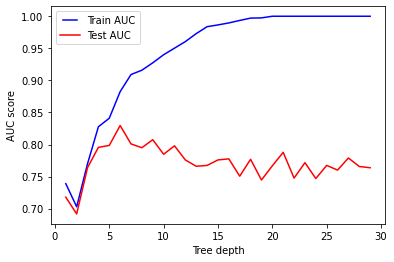

In [47]:
#contoh aja
from sklearn.metrics import roc_curve, auc

train_results = []
test_results = []
for i in range(1, 30):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    #prediksi data train dan hitung roc pada data train
    train_predict = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #add roc_auc to train results
    train_results.append(roc_auc)
    #prediksi data test dan hitung roc pada data test
    test_predict = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #add roc_auc to test_results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(range(1, 30), train_results, 'b', label='Train AUC')
line2, = plt.plot(range(1, 30), test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

#### Decision Tree Model

In [48]:
dectree = DecisionTreeClassifier(max_depth=6)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [49]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [50]:
pd.DataFrame(y_test_pred, columns=['Actual Productivity Prediction'])

,Actual Productivity Prediction
0,1
1,1
2,1
3,1
4,1
...,...
302,0
303,1
304,0
305,0


In [51]:
evaluation_metrics(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[463  83]
 [ 56 630]]
Accuracy   : 88.72 %
Precision  : 88.36 %
Recall     : 91.84 %


1. Persentase akurasi prediksi yang benar adalah 88.72%
2. Persentase precision sebesar 88.36%.
3. Persentase recall sebesar 91.84%

In [52]:
evaluation_metrics(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[121  17]
 [ 36 133]]
Accuracy   : 82.74 %
Precision  : 88.67 %
Recall     : 78.7 %


1. Persentase akurasi prediksi yang benar adalah 82.74%
2. Persentase precision sebesar 88.67%
3. Persentase recall sebesar 78.70%
4. team yang seharusnya diprediksi tidak produktif tetapi diprediksi produktif yaitu 36 masih dianggap terlalu besar nilainya.

In [53]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       138
           1       0.89      0.79      0.83       169

    accuracy                           0.83       307
   macro avg       0.83      0.83      0.83       307
weighted avg       0.83      0.83      0.83       307



#### Random Forest

In [54]:
ranfor = RandomForestClassifier(max_depth=6)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [55]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [56]:
pd.DataFrame(y_test_pred, columns=['Actual Productivity Prediction ranfor'])

,Actual Productivity Prediction ranfor
0,1
1,1
2,1
3,1
4,1
...,...
302,0
303,0
304,0
305,0


In [57]:
evaluation_metrics(y_train, y_train_pred, 'Decision Tree Training ranfor')

Evaluation Model: Decision Tree Training ranfor
[[482  64]
 [ 48 638]]
Accuracy   : 90.91 %
Precision  : 90.88 %
Recall     : 93.0 %


1. Persentase akurasi prediksi yang benar adalah 90.91%
2. Persentase precision sebesar 90.88%.
3. Persentase recall 93.0%

In [58]:
evaluation_metrics(y_test, y_test_pred, 'Decision Tree Testing ranfor')

Evaluation Model: Decision Tree Testing ranfor
[[113  25]
 [ 33 136]]
Accuracy   : 81.11 %
Precision  : 84.47 %
Recall     : 80.47 %


1. Persentase akurasi prediksi yang benar adalah 81.11%
2. Persentase precision sebesar 84.47%.
3. Persentase recall 80.47%
4. hasil modelling random forest dirasa lebih baik dibanding decision tree

In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       138
           1       0.84      0.80      0.82       169

    accuracy                           0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



#### SVM

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [82]:
y_train_pred_svm = classifier.predict(X_train)
y_test_pred_svm = classifier.predict(X_test)

In [83]:
a = pd.DataFrame(y_test_pred_svm, columns=['Actual Productivity Prediction SVM'])
a

,Actual Productivity Prediction SVM
0,1
1,1
2,1
3,1
4,1
...,...
302,0
303,0
304,0
305,0


In [84]:
evaluation_metrics(y_train, y_train_pred_svm, 'Training SVM')

Evaluation Model: Training SVM
[[426 120]
 [ 67 619]]
Accuracy   : 84.82 %
Precision  : 83.76 %
Recall     : 90.23 %


1. Persentase akurasi prediksi yang benar adalah 84.82%
2. Persentase precision sebesar 83.76%.
3. Persentase recall 90.23%

In [85]:
evaluation_metrics(y_test, y_test_pred_svm, 'Testing SVM')

Evaluation Model: Testing SVM
[[119  19]
 [ 27 142]]
Accuracy   : 85.02 %
Precision  : 88.2 %
Recall     : 84.02 %


1. Persentase akurasi prediksi yang benar adalah 85.02%
2. Persentase precision sebesar 88.20%.
3. Persentase recall 84.02%

In [65]:
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       138
           1       0.88      0.84      0.86       169

    accuracy                           0.85       307
   macro avg       0.85      0.85      0.85       307
weighted avg       0.85      0.85      0.85       307

